In [5]:
import json
import os.path as osp
import sys
sys.path.append(r'E:\A01_cyclone\02_github\py_script')
from  utils.utils1 import *

data_dir =r'E:\visDrone20191\visDrone2019_coco'
from tqdm import tqdm
type = 'val'
coco_json = osp.join(data_dir, 'VisDrone2019-DET_train_coco.json')
coco_json = osp.join(data_dir, f'VisDrone2019-DET_{type}_coco.json')

ins = read_json_instance(coco_json)

l = ins['images']

In [18]:
import torch
from matplotlib import pyplot as plt
# 将输出转换为numpy数组
x = torch.load('/code/mmyolo/tensor.pt') 
x1 = [x[0][1],x[1][1],x[2][1]]
output_np = x[0][1].detach().cpu()


In [34]:
for i in x:
    print(i.shape)
#  可视化特征图
import numpy as np
def show_feature_map(feature_map):
    # feature_map = feature_map.squeeze(0)
    feature_map = feature_map.cpu().numpy()
    feature_map_num = feature_map.shape[0]
    row_num = np.ceil(np.sqrt(feature_map_num))
    feature_map_num , row_num =int(feature_map_num), int(row_num)
    plt.figure()
    feature_map_num=32
    for index in range(1, feature_map_num+1):
        plt.subplot(row_num, row_num, index)
        plt.imshow(feature_map[index-1], cmap='gray')
        plt.axis('off')
        # scipy.misc.imsave(str(idex)+".png", feature_map[index-1])

    plt.savefig("../../"+str(index)+".png")
    plt.show()
    

torch.Size([6, 256, 160, 160])
torch.Size([6, 256, 80, 80])
torch.Size([6, 256, 40, 40])


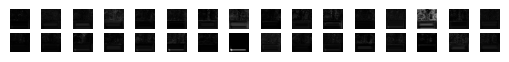

In [35]:
show_feature_map(output_np)

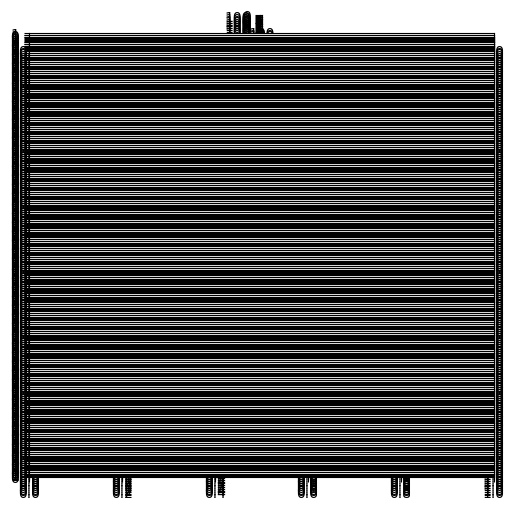

In [13]:

# 绘制可视化图像
fig, axes = plt.subplots(nrows=output_np.shape[0], ncols=1, figsize=(6, 6))
for i in range(10):
    axes[i].imshow(output_np[i])
plt.show()